<a href="https://colab.research.google.com/github/ykato27/GAN/blob/main/DALL%C2%B7E_mini_Inference_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DALL·E mini - Inference pipeline

*Generate images from a text prompt*

<img src="https://github.com/borisdayma/dalle-mini/blob/main/img/logo.png?raw=true" width="200">

This notebook illustrates [DALL·E mini](https://github.com/borisdayma/dalle-mini) inference pipeline.

Just want to play? Use [the demo](https://huggingface.co/spaces/flax-community/dalle-mini) (temporarily in beta on Huging Face Spaces but soon to be open to all).

For more understanding of the model, refer to [the report](https://wandb.ai/dalle-mini/dalle-mini/reports/DALL-E-mini--Vmlldzo4NjIxODA).

## Install dependencies

In [1]:
!pip install -q transformers flax
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git  # VQGAN model in JAX
!git clone https://github.com/borisdayma/dalle-mini  # Model files
%cd dalle-mini/

     |████████████████████████████████| 2.8 MB 5.6 MB/s 
     |████████████████████████████████| 183 kB 45.9 MB/s 
     |████████████████████████████████| 636 kB 43.4 MB/s 
     |████████████████████████████████| 895 kB 41.2 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 
     |████████████████████████████████| 118 kB 34.6 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
Cloning into 'dalle-mini'...
remote: Enumerating objects: 1304, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 1304 (delta 368), reused 363 (delta 278), pack-reused 798
Receiving objects: 100% (1304/1304), 15.63 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (759/759), done.
/content/dalle-mini


## Generate encoded images

We generate prediction samples from a text prompt using `flax-community/dalle-mini` model.

In [2]:
import random

import jax
from dalle_mini.model import CustomFlaxBartForConditionalGeneration
from tqdm.notebook import tqdm, trange
from transformers import BartTokenizer

In [3]:
# make sure we use compatible versions
DALLE_REPO = "flax-community/dalle-mini"
DALLE_COMMIT_ID = "4d34126d0df8bc4a692ae933e3b902a1fa8b6114"

In [4]:
# set up tokenizer and model
tokenizer = BartTokenizer.from_pretrained(DALLE_REPO, revision=DALLE_COMMIT_ID)
model = CustomFlaxBartForConditionalGeneration.from_pretrained(
    DALLE_REPO, revision=DALLE_COMMIT_ID
)

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/343 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

INFO:absl:Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO:absl:Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.


In [5]:
# set a prompt
prompt = "picture of a waterfall under the sunset"

In [6]:
# tokenize the prompt
tokenized_prompt = tokenizer(
    prompt, return_tensors="jax", padding="max_length", truncation=True, max_length=128
)
tokenized_prompt

{'input_ids': DeviceArray([[    0, 37587,     9,    10, 35076,   223,     5, 18820,
                  2,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
      

Notes:

* `0`: BOS, special token representing the beginning of a sequence
* `2`: EOS, special token representing the end of a sequence
* `1`: special token representing the padding of a sequence when requesting a specific length

In [7]:
n_predictions = 8

# create random keys
seed = random.randint(0, 2 ** 32 - 1)
key = jax.random.PRNGKey(seed)
subkeys = jax.random.split(key, num=n_predictions)
subkeys

DeviceArray([[3717478670, 1248653203],
             [3588370624, 3485519795],
             [ 659954588,  328845072],
             [1720102840, 3904852175],
             [1269862292, 3907189392],
             [3840055694, 2299732310],
             [2754775754, 3039002826],
             [1781104768, 2426714163]], dtype=uint32)

In [8]:
# generate sample predictions
encoded_images = [
    model.generate(**tokenized_prompt, do_sample=True, num_beams=1, prng_key=subkey)
    for subkey in tqdm(subkeys)
]
encoded_images[0]

  0%|          | 0/8 [00:00<?, ?it/s]

FlaxSampleOutput([('sequences',
                   DeviceArray([[16384,  1948, 13769,  8493,  3812, 16068,  7712,  2127,
                                 14703,  5537,  8222,  1933, 12672,  5401, 10280, 15303,
                                 12927, 13543,  7106, 13500,  8867, 10200, 12618,  6464,
                                 15963, 11941,  2683,  9819,  2778, 15342,  7106,  1933,
                                  1933, 13500, 15303,  7106,  1570, 12927, 10274,  2334,
                                  3029,  4460, 13543,  1402, 10797,  2595,  9957, 14283,
                                 11429,  5401,  5171, 12927,  5071, 15945, 12353,  1586,
                                 10200,  2987,  5401, 12566,  7806, 10487, 12857,  7259,
                                  5213, 10278, 11951, 14037, 10227, 12672,  9514, 11927,
                                 13342,  8222, 15303,  5360,  6779, 13236,  6779,  2813,
                                 15076,  6386,  9899,  8412,  1402,  8737,  15

The first token (`16384`) is a special token representing the start of a sequence in the decoder (not part of the image codebook).

In [9]:
# remove first token (BOS)
encoded_images = [img.sequences[..., 1:] for img in encoded_images]
encoded_images[0]

DeviceArray([[ 1948, 13769,  8493,  3812, 16068,  7712,  2127, 14703,
               5537,  8222,  1933, 12672,  5401, 10280, 15303, 12927,
              13543,  7106, 13500,  8867, 10200, 12618,  6464, 15963,
              11941,  2683,  9819,  2778, 15342,  7106,  1933,  1933,
              13500, 15303,  7106,  1570, 12927, 10274,  2334,  3029,
               4460, 13543,  1402, 10797,  2595,  9957, 14283, 11429,
               5401,  5171, 12927,  5071, 15945, 12353,  1586, 10200,
               2987,  5401, 12566,  7806, 10487, 12857,  7259,  5213,
              10278, 11951, 14037, 10227, 12672,  9514, 11927, 13342,
               8222, 15303,  5360,  6779, 13236,  6779,  2813, 15076,
               6386,  9899,  8412,  1402,  8737,  1570, 12082, 10200,
               2469,  2157,  2572,  2157,  5984,  4945, 14416,  1811,
              14134, 14899,  3583, 15729, 16314,  5762, 15342,  3212,
               2481, 13712,  3851, 15514, 11004,  8663,  1008,  2881,
               9570,

The generated images are now represented by 256 tokens.

In [10]:
encoded_images[0].shape

(1, 256)

## Decode images

The generated images need to be decoded with `flax-community/vqgan_f16_16384`.

In [11]:
import numpy as np
from PIL import Image
from vqgan_jax.modeling_flax_vqgan import VQModel

In [12]:
# make sure we use compatible versions
VQGAN_REPO = "flax-community/vqgan_f16_16384"
VQGAN_COMMIT_ID = "90cc46addd2dd8f5be21586a9a23e1b95aa506a9"

In [13]:
# set up VQGAN
vqgan = VQModel.from_pretrained(VQGAN_REPO, revision=VQGAN_COMMIT_ID)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/304M [00:00<?, ?B/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


In [14]:
# decode images
decoded_images = [
    vqgan.decode_code(encoded_image) for encoded_image in tqdm(encoded_images)
]
decoded_images[0]

  0%|          | 0/8 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


DeviceArray([[[[ 3.08182269e-01,  4.20198679e-01,  4.51525629e-01],
               [ 3.02290857e-01,  4.49892372e-01,  4.66562390e-01],
               [ 3.00759047e-01,  4.18264598e-01,  4.55406427e-01],
               ...,
               [ 9.05447781e-01,  6.46611691e-01, -1.18429065e-01],
               [ 9.09182549e-01,  6.05552137e-01, -1.13844246e-01],
               [ 9.41843569e-01,  6.54770374e-01,  5.28867990e-02]],

              [[ 2.96015114e-01,  4.34349924e-01,  4.70673800e-01],
               [ 3.18075120e-01,  4.29677099e-01,  4.68266726e-01],
               [ 3.41947436e-01,  4.33673561e-01,  4.83047903e-01],
               ...,
               [ 9.74625409e-01,  6.63627386e-01, -9.12991762e-02],
               [ 9.91407692e-01,  6.62094176e-01, -8.24299008e-02],
               [ 9.25392747e-01,  6.23443604e-01,  9.52422619e-04]],

              [[ 3.11763287e-01,  4.41141099e-01,  4.94545579e-01],
               [ 3.39660227e-01,  4.50322330e-01,  4.71862972e-01],
    

In [15]:
# normalize images
clipped_images = [img.squeeze().clip(0.0, 1.0) for img in decoded_images]

In [16]:
# convert to image
images = [
    Image.fromarray(np.asarray(img * 255, dtype=np.uint8)) for img in clipped_images
]

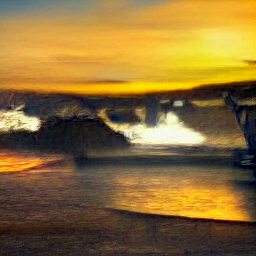

In [17]:
# display an image
images[0]

## Rank images with CLIP

We use `openai/clip-vit-base-patch32` to rank generated images against the prompt.

In [18]:
from transformers import CLIPProcessor, FlaxCLIPModel

In [19]:
# set up model and processor
clip = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Downloading:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.49M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


The CLIP processor tokenizes text and pre-processes images (resize to 224x224 and normalize) as required per the CLIP model.

In [20]:
# evaluate scores
inputs = processor(text=prompt, images=images, return_tensors="np")
logits = clip(**inputs).logits_per_image
scores = jax.nn.softmax(logits, axis=0).squeeze()  # normalize and sum all scores to 1

Prompt: picture of a waterfall under the sunset

Score: 0.8832901120185852


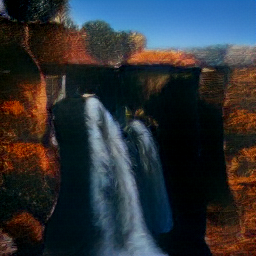


Score: 0.060904599726200104


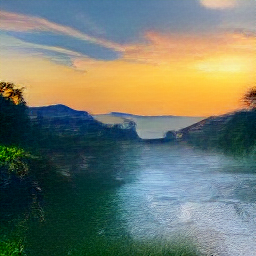


Score: 0.028296971693634987


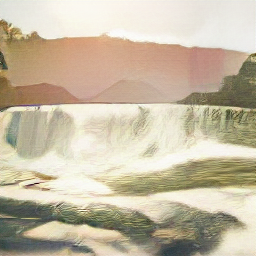


Score: 0.02098104916512966


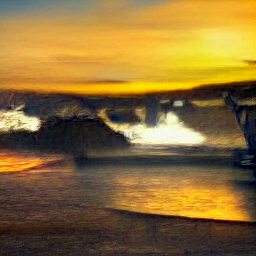


Score: 0.003715268336236477


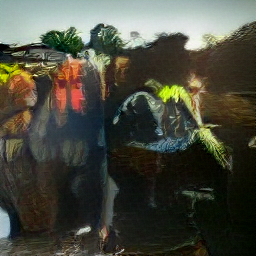


Score: 0.0024381920229643583


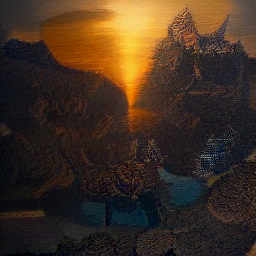


Score: 0.00036186337820254266


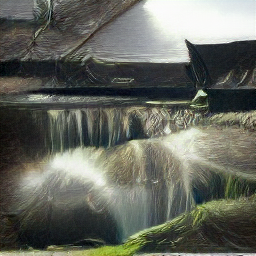


Score: 1.1868311958096456e-05


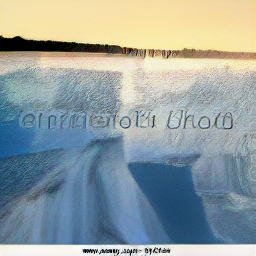

In [21]:
# rank images by score
print(f"Prompt: {prompt}\n")
for idx in scores.argsort()[::-1]:
    print(f"Score: {scores[idx]}")
    display(images[idx])
    print()

## Leverage JAX for faster inference

[JAX](https://github.com/google/jax) uses XLA to compile code to GPU/TPU, leading to faster inference.

Even with only 1 GPU, we can benefit from impressive speedups, even more after first inference (where the compilation happens).

In [22]:
from functools import partial

from flax.jax_utils import replicate
from flax.training.common_utils import shard

In [23]:
# check we can access TPU's or GPU's
jax.devices()

[GpuDevice(id=0, process_index=0)]

In [24]:
# replicate parameters on all devices
dalle_params = replicate(model.params)
vqgan_params = replicate(vqgan.params)

/usr/local/lib/python3.7/dist-packages/jax/lib/xla_bridge.py:391: UserWarning: jax.host_count has been renamed to jax.process_count. This alias will eventually be removed; please update your code.
  "jax.host_count has been renamed to jax.process_count. This alias "
/usr/local/lib/python3.7/dist-packages/jax/lib/xla_bridge.py:378: UserWarning: jax.host_id has been renamed to jax.process_index. This alias will eventually be removed; please update your code.
  "jax.host_id has been renamed to jax.process_index. This alias "


In [25]:
# one set of inputs per device
prompt = ["picture of a waterfall under the sunset"] * jax.device_count()

In [26]:
# tokenize prompts and shard them across available devices
tokenized_prompt = tokenizer(
    prompt, return_tensors="jax", padding="max_length", truncation=True, max_length=128
).data
tokenized_prompt = shard(tokenized_prompt)

We use `pmap` to compile the functions with XLA and perform operations in parallel on multiple devices.

In [27]:
# parallelize and compile functions

# function to generate encoded images
@partial(jax.pmap, axis_name="batch")
def p_generate(tokenized_prompt, key, params):
    return model.generate(
        **tokenized_prompt, do_sample=True, num_beams=1, prng_key=key, params=params
    )


# function to decode images
@partial(jax.pmap, axis_name="batch")
def p_decode(indices, params):
    return vqgan.decode_code(indices, params=params)

In [28]:
# generate images with compiled functions
n_predictions = 8
images = []

for i in trange(n_predictions // jax.device_count()):
    key, *subkeys = jax.random.split(key, jax.device_count() + 1)
    subkeys = jax.numpy.stack(subkeys)

    encoded_images = p_generate(tokenized_prompt, subkeys, dalle_params)
    encoded_images = encoded_images.sequences[..., 1:]

    decoded_images = p_decode(encoded_images, vqgan_params)
    decoded_images = decoded_images.clip(0.0, 1.0).reshape((-1, 256, 256, 3))

    for img in decoded_images:
        images.append(Image.fromarray(np.asarray(img * 255, dtype=np.uint8)))

  0%|          | 0/8 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


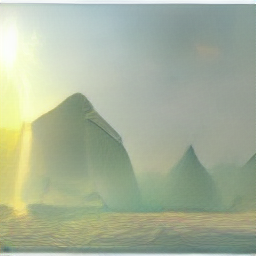

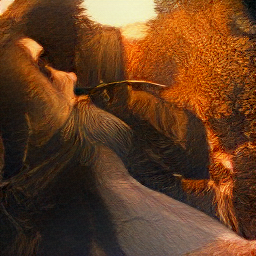

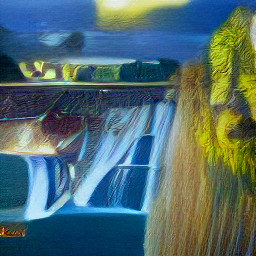

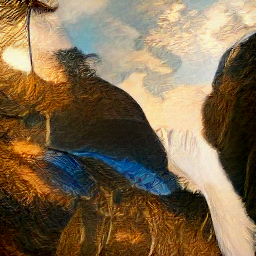

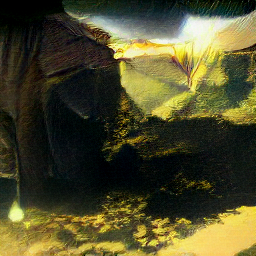

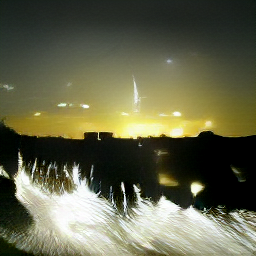

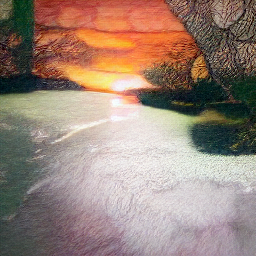

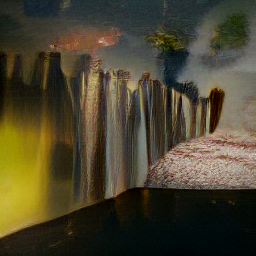

In [29]:
for img in images:
    display(img)
    print()